In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("COVID-19 GLOBAL CASES - EXPLORATORY DATA ANALYSIS")
print("=" * 60)

COVID-19 GLOBAL CASES - EXPLORATORY DATA ANALYSIS


In [8]:
print("\n1. IMPORTING DATASET")
print("-" * 30)

df = pd.read_csv('country_wise_latest.csv')
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")


1. IMPORTING DATASET
------------------------------
Dataset loaded successfully!
Dataset shape: (187, 15)


In [9]:
print("\n2. DATA CLEANING")
print("-" * 30)

print("Null values in each column:")
print(df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

print(f"\nData types:")
print(df.dtypes)

df_clean = df.copy()
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(0)

print("Data cleaning completed!")


2. DATA CLEANING
------------------------------
Null values in each column:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

Number of duplicate rows: 0

Data types:
Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week

In [10]:
print("\n3. BASIC EXPLORATORY DATA ANALYSIS")
print("-" * 40)

print("Top 5 rows of the dataset:")
print(df_clean.head())


3. BASIC EXPLORATORY DATA ANALYSIS
----------------------------------------
Top 5 rows of the dataset:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Con

In [11]:
print("\nSummary statistics:")
print(df_clean.describe())


Summary statistics:
          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173

In [12]:
print(f"\nNumber of countries in the dataset: {len(df_clean)}")


Number of countries in the dataset: 187


In [28]:
print("\nMost affected countries:")
print("\nTop 10 countries by Confirmed cases:")
top_confirmed = df_clean.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
print(top_confirmed)

print("\nTop 10 countries by Deaths:")
top_deaths = df_clean.nlargest(10, 'Deaths')[['Country/Region', 'Deaths']]
print(top_deaths)

print("\nTop 10 countries by Recovered:")
top_recovered = df_clean.nlargest(10, 'Recovered')[['Country/Region', 'Recovered']]
print(top_recovered)


Most affected countries:

Top 10 countries by Confirmed cases:
     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606

Top 10 countries by Deaths:
     Country/Region  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112
79            India   33408
61           France   30212
157           Spain   28432
132            Peru   18418
81             Iran   15912

Top 10 countries by Recovered:
    Country/Region  Recovered
23          Brazil    1846641
173             US    1325804
79           India     951166
138         Russia     602249
35           Chile     319954
111         Mexico     303810
154   South Afri

In [14]:
print("\n4. CREATING VISUALIZATIONS")
print("-" * 35)


4. CREATING VISUALIZATIONS
-----------------------------------


In [15]:
fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

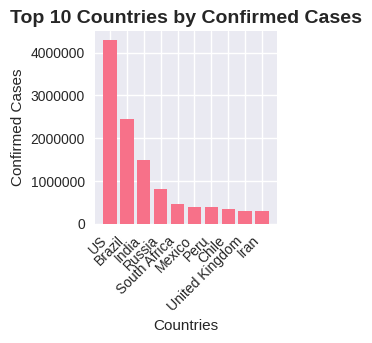

In [16]:
plt.subplot(2, 3, 1)
top_10_confirmed = df_clean.nlargest(10, 'Confirmed')
plt.bar(range(len(top_10_confirmed)), top_10_confirmed['Confirmed'])
plt.title('Top 10 Countries by Confirmed Cases', fontsize=14, fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Confirmed Cases')
plt.xticks(range(len(top_10_confirmed)), top_10_confirmed['Country/Region'], rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')

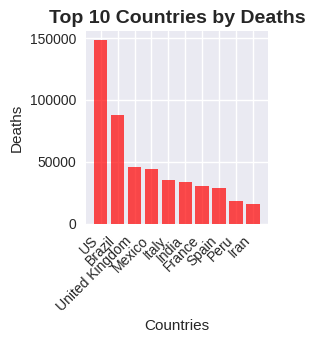

In [17]:
plt.subplot(2, 3, 2)
top_10_deaths = df_clean.nlargest(10, 'Deaths')
plt.bar(range(len(top_10_deaths)), top_10_deaths['Deaths'], color='red', alpha=0.7)
plt.title('Top 10 Countries by Deaths', fontsize=14, fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Deaths')
plt.xticks(range(len(top_10_deaths)), top_10_deaths['Country/Region'], rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')

Text(0.5, 1.0, 'Global COVID-19 Cases Distribution')

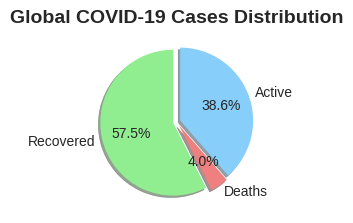

In [18]:
plt.subplot(2, 3, 3)
global_recovered = df_clean['Recovered'].sum()
global_deaths = df_clean['Deaths'].sum()
global_active = df_clean['Active'].sum()

sizes = [global_recovered, global_deaths, global_active]
labels = ['Recovered', 'Deaths', 'Active']
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Global COVID-19 Cases Distribution', fontsize=14, fontweight='bold')

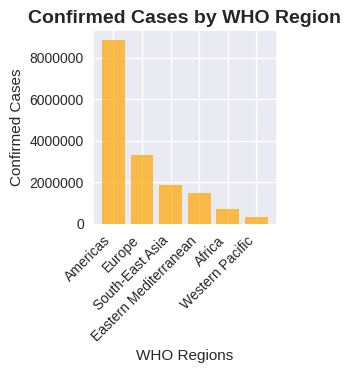

In [19]:
plt.subplot(2, 3, 4)
region_cases = df_clean.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.bar(range(len(region_cases)), region_cases.values, color='orange', alpha=0.7)
plt.title('Confirmed Cases by WHO Region', fontsize=14, fontweight='bold')
plt.xlabel('WHO Regions')
plt.ylabel('Confirmed Cases')
plt.xticks(range(len(region_cases)), region_cases.index, rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')

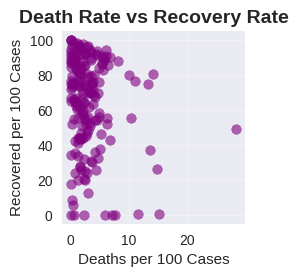

In [20]:
plt.subplot(2, 3, 5)
plt.scatter(df_clean['Deaths / 100 Cases'], df_clean['Recovered / 100 Cases'], alpha=0.6, c='purple')
plt.title('Death Rate vs Recovery Rate', fontsize=14, fontweight='bold')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Recovered per 100 Cases')
plt.grid(True, alpha=0.3)

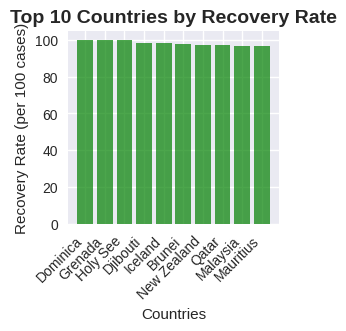

In [21]:
plt.subplot(2, 3, 6)
top_recovery_rate = df_clean.nlargest(10, 'Recovered / 100 Cases')
plt.bar(range(len(top_recovery_rate)), top_recovery_rate['Recovered / 100 Cases'], color='green', alpha=0.7)
plt.title('Top 10 Countries by Recovery Rate', fontsize=14, fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Recovery Rate (per 100 cases)')
plt.xticks(range(len(top_recovery_rate)), top_recovery_rate['Country/Region'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [22]:
print("\n5. ADDITIONAL ANALYSIS")
print("-" * 30)

global_confirmed = df_clean['Confirmed'].sum()
global_deaths = df_clean['Deaths'].sum()
global_recovered = df_clean['Recovered'].sum()
global_active = df_clean['Active'].sum()

print(f"Global Statistics:")
print(f"Total Confirmed Cases: {global_confirmed:,}")
print(f"Total Deaths: {global_deaths:,}")
print(f"Total Recovered: {global_recovered:,}")
print(f"Total Active Cases: {global_active:,}")
print(f"Global Death Rate: {(global_deaths/global_confirmed)*100:.2f}%")
print(f"Global Recovery Rate: {(global_recovered/global_confirmed)*100:.2f}%")


5. ADDITIONAL ANALYSIS
------------------------------
Global Statistics:
Total Confirmed Cases: 16,480,485
Total Deaths: 654,036
Total Recovered: 9,468,087
Total Active Cases: 6,358,362
Global Death Rate: 3.97%
Global Recovery Rate: 57.45%


In [23]:
print(f"\nCountries with highest death rates:")
high_death_rate = df_clean.nlargest(10, 'Deaths / 100 Cases')[['Country/Region', 'Deaths / 100 Cases']]
print(high_death_rate)


Countries with highest death rates:
     Country/Region  Deaths / 100 Cases
184           Yemen               28.56
177  United Kingdom               15.19
16          Belgium               14.79
85            Italy               14.26
61           France               13.71
77          Hungary               13.40
120     Netherlands               11.53
111          Mexico               11.13
157           Spain               10.44
183  Western Sahara               10.00


In [24]:
print(f"\nCountries with highest recovery rates:")
high_recovery_rate = df_clean.nlargest(10, 'Recovered / 100 Cases')[['Country/Region', 'Recovered / 100 Cases']]
print(high_recovery_rate)


Countries with highest recovery rates:
    Country/Region  Recovered / 100 Cases
49        Dominica                 100.00
69         Grenada                 100.00
75        Holy See                 100.00
48        Djibouti                  98.38
78         Iceland                  98.33
24          Brunei                  97.87
121    New Zealand                  97.24
136          Qatar                  97.02
105       Malaysia                  96.60
110      Mauritius                  96.51


In [25]:
print("\n6. KEY OBSERVATIONS AND INSIGHTS")
print("-" * 40)

observations = [
    "1. The United States has the highest number of confirmed cases, followed by Brazil and India.",
    "2. The global recovery rate is significantly higher than the death rate.",
    f"3. {df_clean.loc[df_clean['Deaths / 100 Cases'].idxmax(), 'Country/Region']} has the highest death rate at {df_clean['Deaths / 100 Cases'].max():.2f}%.",
    f"4. {df_clean.loc[df_clean['Recovered / 100 Cases'].idxmax(), 'Country/Region']} has the highest recovery rate at {df_clean['Recovered / 100 Cases'].max():.2f}%.",
    "5. The Americas region shows the highest number of confirmed cases among WHO regions.",
    "6. There's a wide variation in death rates across countries, suggesting different healthcare capacities and response strategies.",
    "7. Some countries show very high recovery rates (>90%), indicating effective treatment protocols.",
    f"8. The dataset covers {len(df_clean)} countries/regions worldwide.",
    "9. Active cases vary significantly across countries, with some having very low active cases despite high total cases.",
    "10. The relationship between death rate and recovery rate shows an inverse correlation in most cases."
]

for observation in observations:
    print(observation)


6. KEY OBSERVATIONS AND INSIGHTS
----------------------------------------
1. The United States has the highest number of confirmed cases, followed by Brazil and India.
2. The global recovery rate is significantly higher than the death rate.
3. Yemen has the highest death rate at 28.56%.
4. Dominica has the highest recovery rate at 100.00%.
5. The Americas region shows the highest number of confirmed cases among WHO regions.
6. There's a wide variation in death rates across countries, suggesting different healthcare capacities and response strategies.
7. Some countries show very high recovery rates (>90%), indicating effective treatment protocols.
8. The dataset covers 187 countries/regions worldwide.
9. Active cases vary significantly across countries, with some having very low active cases despite high total cases.
10. The relationship between death rate and recovery rate shows an inverse correlation in most cases.


In [26]:
print("\n" + "=" * 60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)


ANALYSIS COMPLETED SUCCESSFULLY!


In [27]:
summary_stats = df_clean.describe()
print(f"\nSummary statistics saved. Dataset contains {len(df_clean)} countries/regions.")
print(f"Analysis completed on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Summary statistics saved. Dataset contains 187 countries/regions.
Analysis completed on 2025-11-24 05:24:26
